In [1]:
import sys
# To import python scripts from other folders
sys.path.append('../')
import matplotlib.pyplot as plt
import json
from ProjectTestAnalysis import ProjectTestAnalysis
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import re
import csv
root="/home/jovyan/work"
results_path=root+"/results/"
procesed_results_path=root+"/notebooks/ProjectAnalysis/TestAnalysis/results/"

In [2]:
def getProjects(dataset):
    path = root+"/configFiles/%sProjects/"%dataset
    projects = []
    for configFile in os.listdir(path):
        with open(path+configFile) as f:
            project_info = json.load(f)
            if os.path.isdir(procesed_results_path+project_info["project"]):
                projects.append((dataset, project_info["project"]))
    return projects

In [3]:
# Get Projects names
github = getProjects("GitHub")
apache = getProjects("Apache")
many4j = getProjects("ManySStub4J")
all_datasets = github + apache + many4j

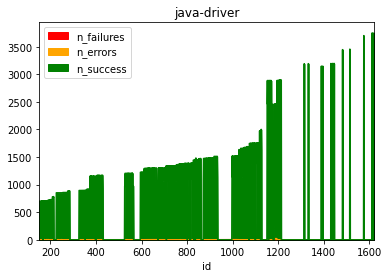

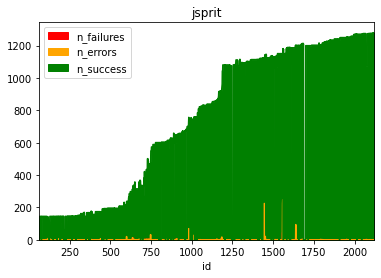

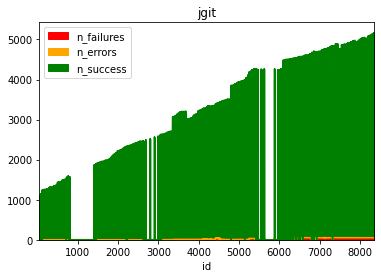

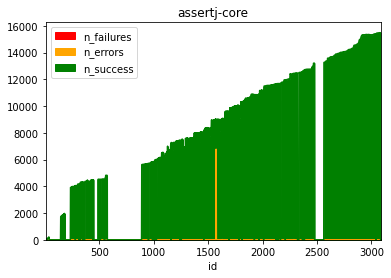

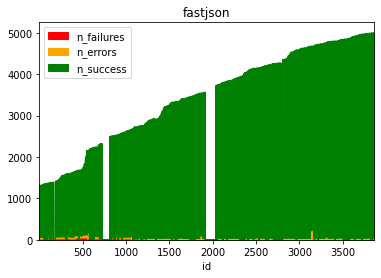

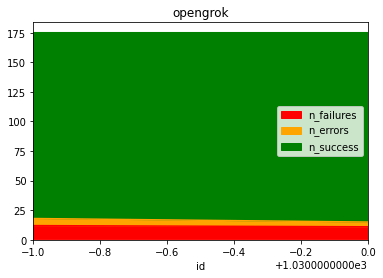

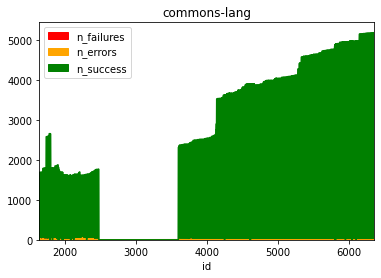

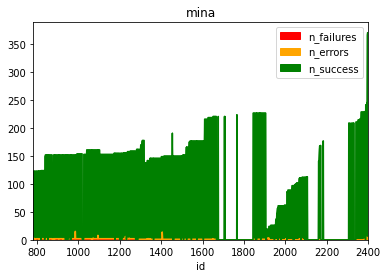

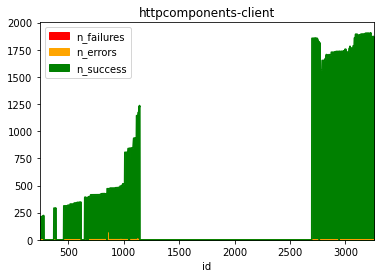

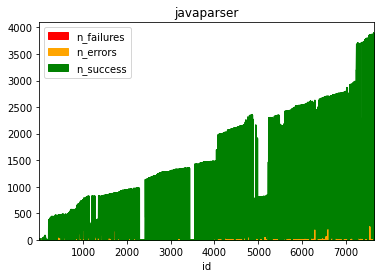

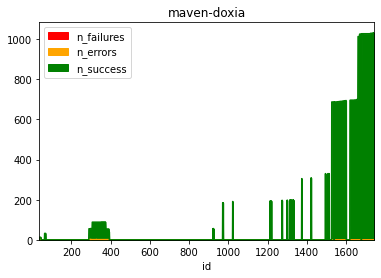

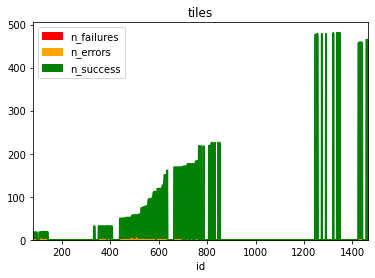

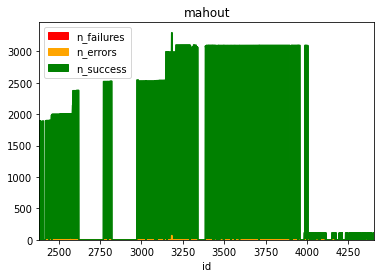

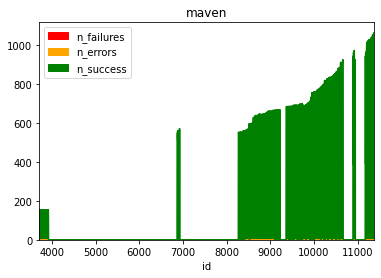

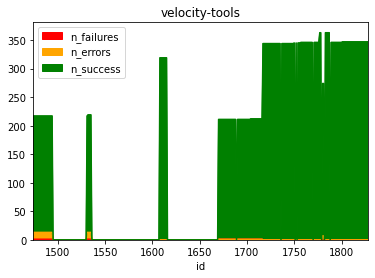

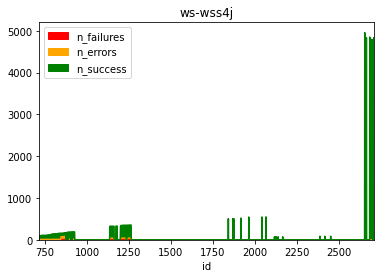

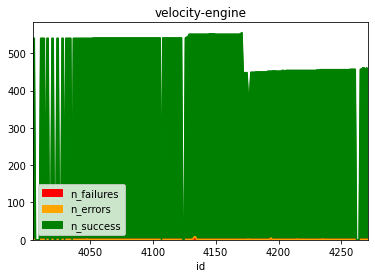

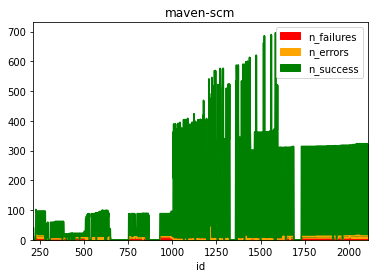

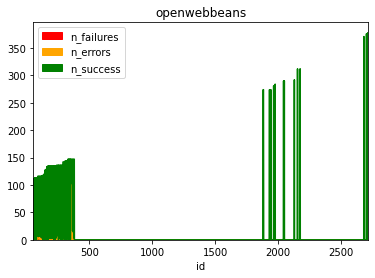

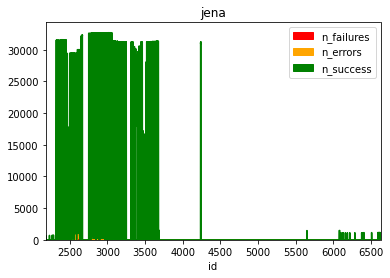

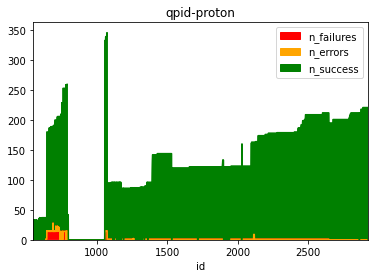

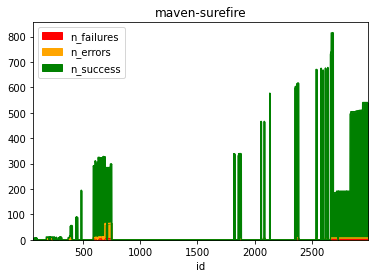

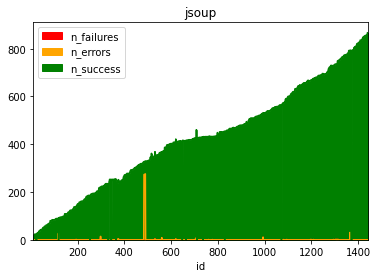

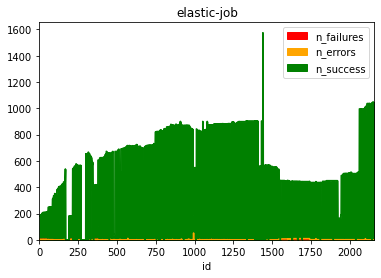

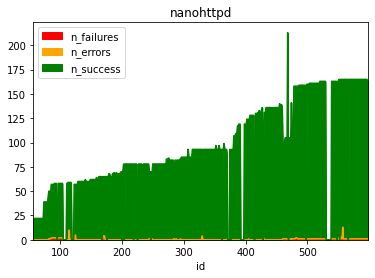

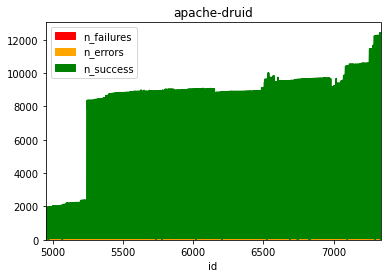

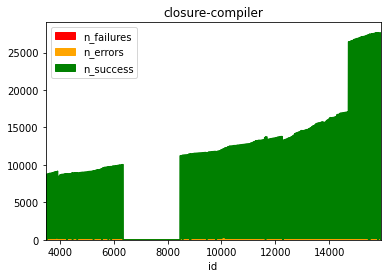

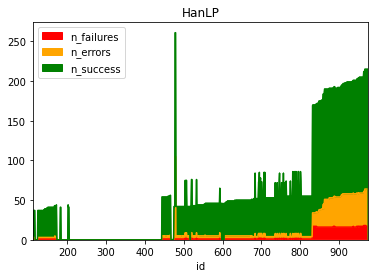

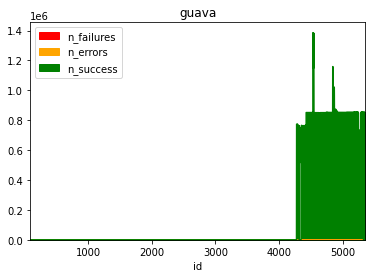

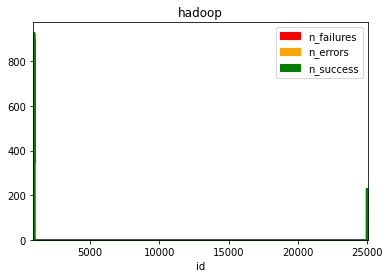

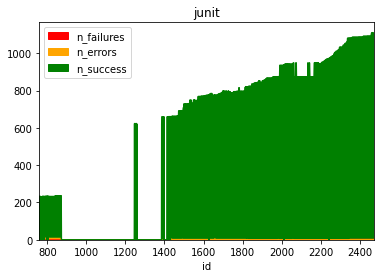

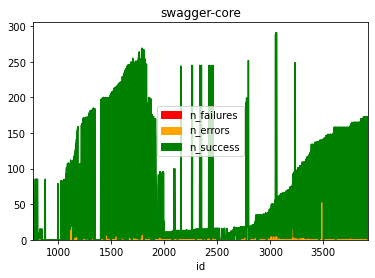

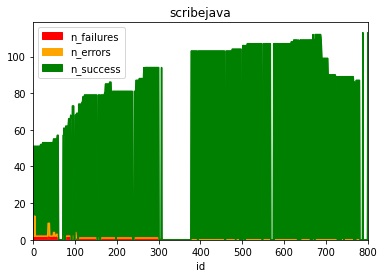

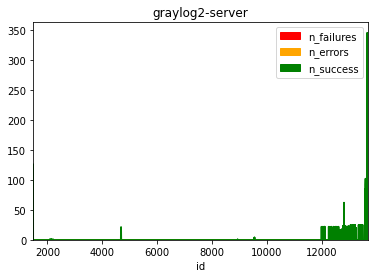

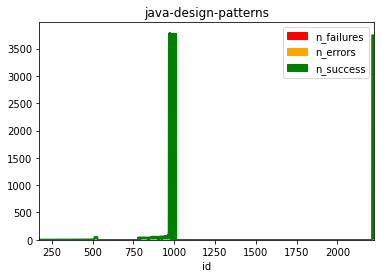

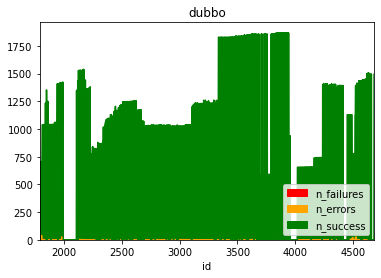

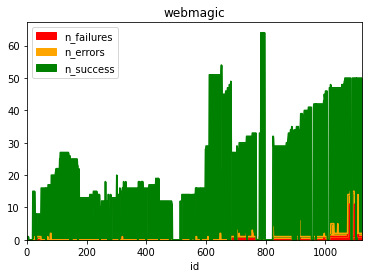

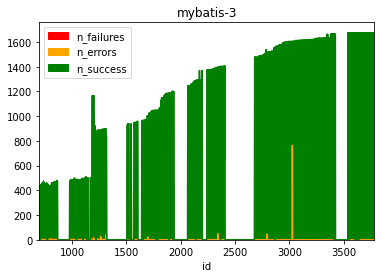

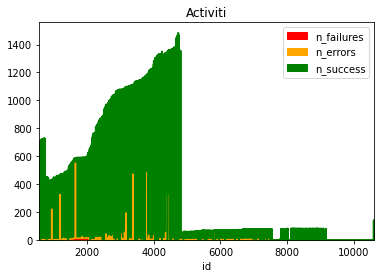

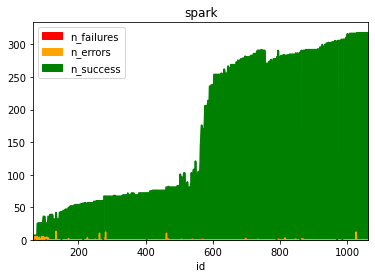

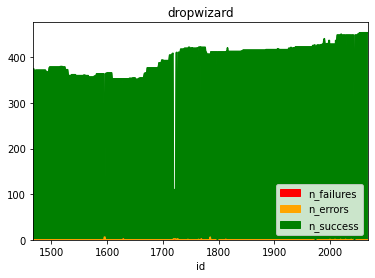

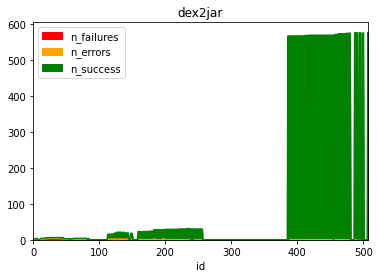

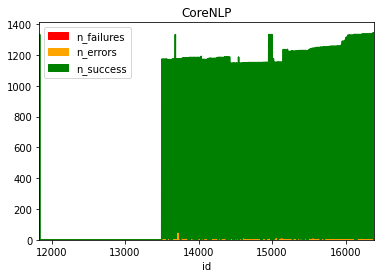

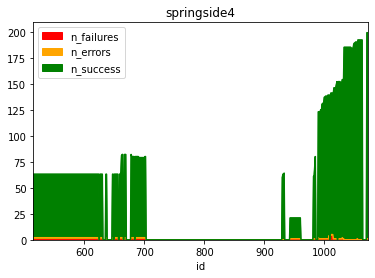

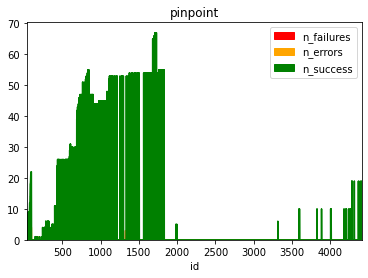

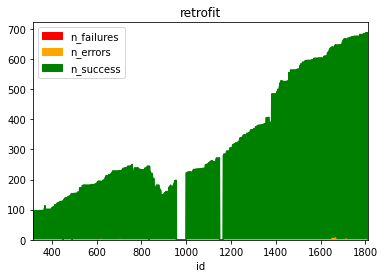

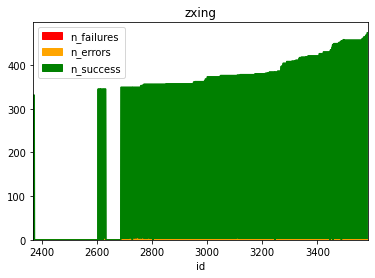

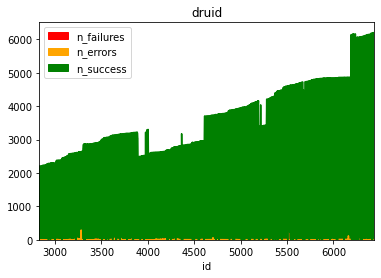

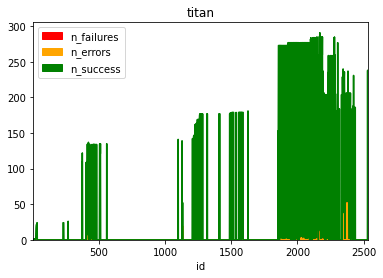

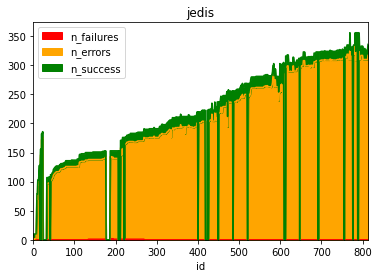

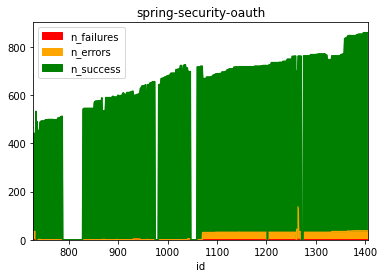

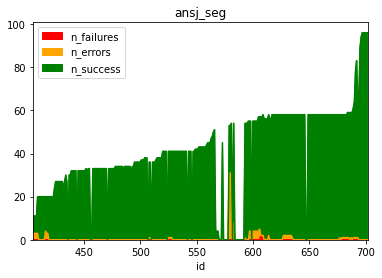

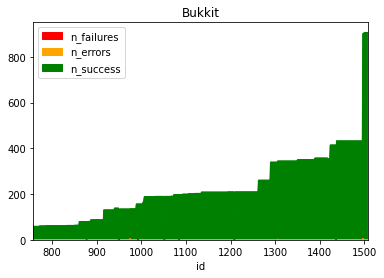

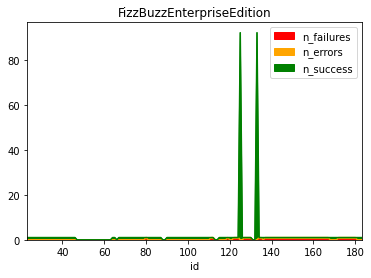

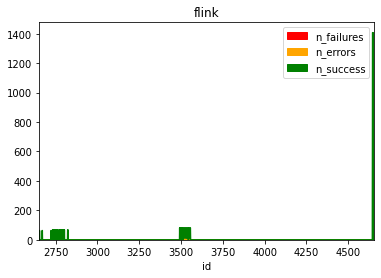

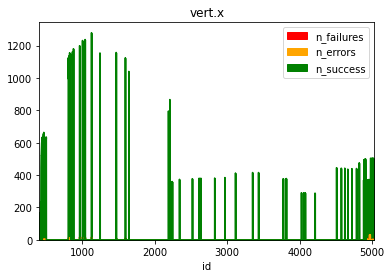

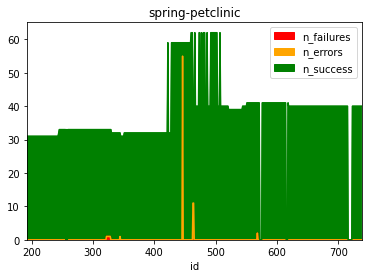

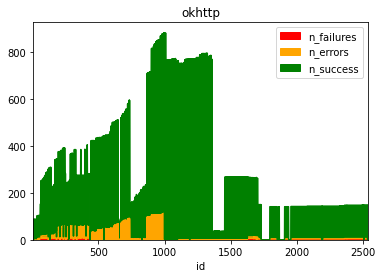

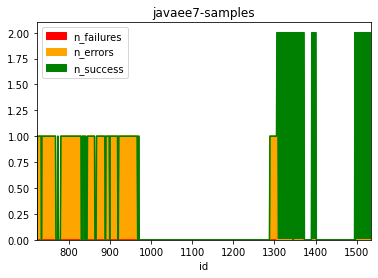

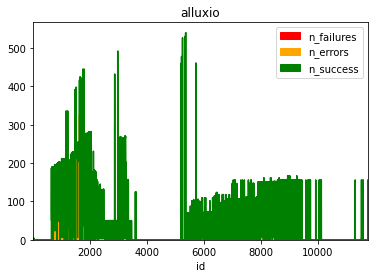

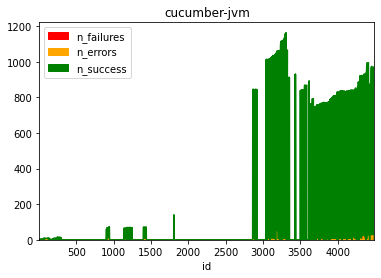

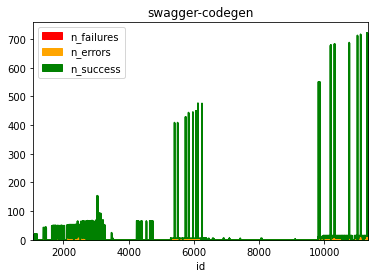

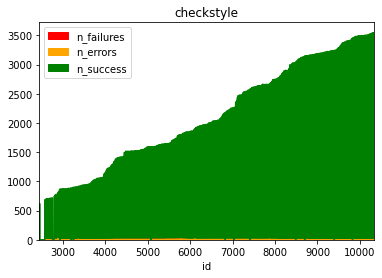

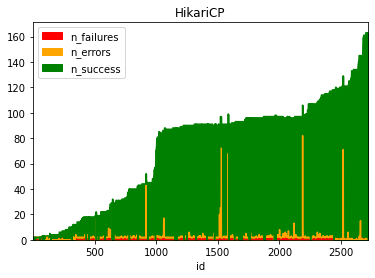

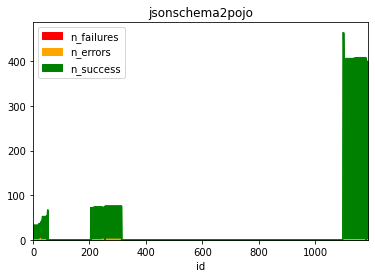

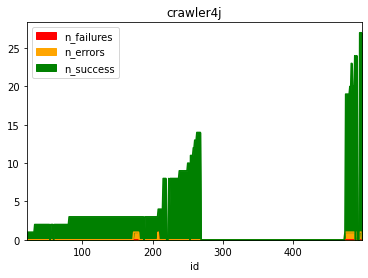

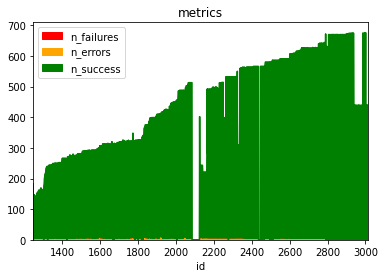

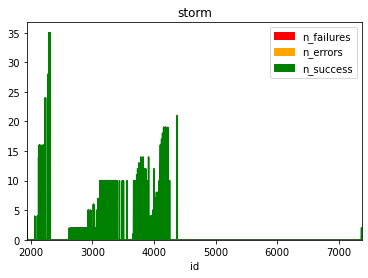

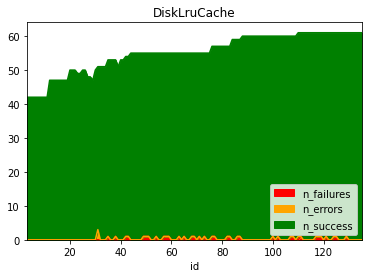

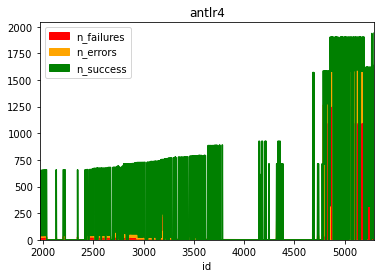

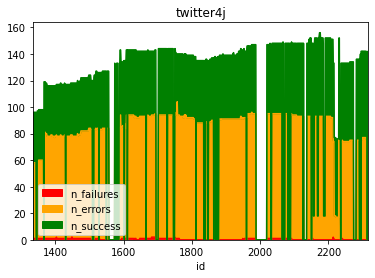

In [28]:
all_projects_src_errors = []
all_projects_test_errors = []

all_errors = []

for dataset, project in all_datasets:
    
    build_test_errors_path = procesed_results_path+project+"/errors_count.csv"
    
    if os.path.isfile(build_test_errors_path):# and project == 'vert.x':
        
         pa = ProjectTestAnalysis(project,  2, root=root)
         pa.generateAndSavePlot()
        
         with open(build_test_errors_path) as csvfile:
            reader = csv.DictReader(csvfile)
            total_errors = 0
            errors = []
            for row in reader:
                count = int(row['count'])
                total_errors += count
                errors.append((row['error'], count))
            
            for error in errors:
                all_errors.append([dataset, project, error[0], error[1], (error[1] / total_errors)*100 ])

                
errors_df = pd.DataFrame(all_errors, columns = ['Dataset', 'Project', 'Error', 'Count', "%"])

In [27]:
errors_df.sort_values(by=['Count'], ascending=False).head(50)

,Dataset,Project,Error,Count,%
3511,ManySStub4J,jedis,java.net.ConnectException: Connection refused (Connection refused),125915,76.790550
4385,ManySStub4J,twitter4j,,66150,92.438619
4074,ManySStub4J,antlr4,,53747,24.136971
4086,ManySStub4J,antlr4,Could not locate python2.7,52408,23.535646
4089,ManySStub4J,antlr4,Could not locate g++,51418,23.091052
4087,ManySStub4J,antlr4,Could not locate python3.5,51152,22.971595
1835,Apache,jena,,39853,51.068056
1837,Apache,jena,Already open: /tmp/TDBTest/journal.jrnl,37151,47.605684
3556,ManySStub4J,okhttp,Could not initialize class sun.security.ssl.SSLExtension,32729,61.198579
3497,ManySStub4J,jedis,Connection refused (Connection refused),30611,18.668431


In [30]:
pd.set_option('display.max_colwidth', -1)
errors_df[errors_df['Count'] > 1000].sort_values(by=['%'], ascending=False).head(50)

/tmp/ipykernel_23049/850411905.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Dataset,Project,Error,Count,%
473,GitHub,assertj-core,Could not initialize class org.mockito.internal.util.MockUtil,6770,99.485672
1999,ManySStub4J,jsoup,Could not initialize class org.jsoup.nodes.Entities$EscapeMode,1891,95.264484
3525,ManySStub4J,spring-security-oauth,Cannot get Jedis connection; nested exception is redis.clients.jedis.exceptions.JedisConnectionException: java.net.ConnectException: Connection refused (Connection refused),10374,94.369144
2070,ManySStub4J,closure-compiler,java.lang.RuntimeException: java.io.NotSerializableException: com.google.javascript.jscomp.newtypes.NaivePersistentMap,5565,93.184863
4385,ManySStub4J,twitter4j,,66150,92.438619
2015,ManySStub4J,elastic-job,Could not load TestContextBootstrapper [null]. Specify @BootstrapWith&#x27;s &#x27;value&#x27; attribute or make the default bootstrapper class available.,1728,88.479263
3511,ManySStub4J,jedis,java.net.ConnectException: Connection refused (Connection refused),125915,76.790550
1989,Apache,maven-surefire,java.lang.IndexOutOfBoundsException,1496,64.427218
1804,Apache,maven-scm,No such file or directory,4651,63.940060
3556,ManySStub4J,okhttp,Could not initialize class sun.security.ssl.SSLExtension,32729,61.198579


In [23]:
pd.set_option('display.max_colwidth', 100)
errors_df[errors_df['Error'].str.contains("Connection refused")].sort_values(by=['%'], ascending=False)

,Dataset,Project,Error,Count,%
3525,ManySStub4J,spring-security-oauth,Cannot get Jedis connection; nested exception is redis.clients.jedis.exceptions.JedisConnectionE...,10374,94.369144
3511,ManySStub4J,jedis,java.net.ConnectException: Connection refused (Connection refused),125915,76.790550
3570,ManySStub4J,javaee7-samples,Could not connect to DAS on: http://localhost:4848 | Connection refused (Connection refused),121,51.489362
1374,Apache,velocity-tools,Connection refused (Connection refused),104,31.901840
3497,ManySStub4J,jedis,Connection refused (Connection refused),30611,18.668431
3219,ManySStub4J,spark,Connect to localhost:9393 [localhost/127.0.0.1] failed: Connection refused (Connection refused),12,8.275862
3216,ManySStub4J,spark,java.net.ConnectException: Connection refused (Connection refused),11,7.586207
3217,ManySStub4J,spark,Connection refused (Connection refused),1,0.689655
3218,ManySStub4J,spark,Connect to localhost:4567 [localhost/127.0.0.1] failed: Connection refused (Connection refused),1,0.689655
2369,ManySStub4J,mybatis-3,\n### Error updating database. Cause: org.postgresql.util.PSQLException: Connection refused. Ch...,2,0.105430
